In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Create SQLAlchemy engine
engine = create_engine("mysql+pymysql://root:@localhost:3306/diet_center_analysis")

# Customers with diet programs

### Customers without Diet Programs

In [2]:
# customers without diet programs
df_customers_without_programs = pd.read_sql_query("""
                                                  select c.username, c.phone, c.email, c.gender, c.date_of_birth, c.height, c.weight, n.name_en as nationality 
                                                  from customers c left join customers_programs cp 
                                                  on c.id = cp.customer_id
                                                  inner join nationalities n on n.id = c.nationality_id
                                                  where cp.customer_id is null and c.deleted_at  is null""", engine)
df_customers_without_programs

,username,phone,email,gender,date_of_birth,height,weight,nationality
0,tareq,66646675,None,male,2002-01-12,0,0,Syria
1,Nader,99960074,None,male,1973-12-19,0,0,Egypt
2,faisal,99633344,None,male,1964-07-16,173,89,Kuwait
3,amenaalaqoul,51212463,None,female,2002-03-14,0,0,Kuwait
4,Virginia,97119432,v.ysmael@dietcenterkuwait,female,1968-02-13,5,60,Philippines
...,...,...,...,...,...,...,...,...
4844,Meshary,94185567,alsuwait112233@gmail.com,male,2005-09-12,172,96,Kuwait
4845,ahmadshanfa,55514589,ahmadshanfa91@gmail.com,male,1991-12-27,175,110,Kuwait
4846,dodo,55194014,itsdeema444@gmail.com,female,2003-12-03,155,60,Kuwait
4847,Abeer Fahad,94055774,None,female,1995-10-03,161,82,Kuwait


In [3]:
px.histogram(
    df_customers_without_programs,
    x='nationality',
    title='Number of Customers without Diet Programs by Nationality',
    text_auto=True,
    color='gender',
).update_layout(bargap=0.2)

In [4]:
px.pie(
    df_customers_without_programs,
    names='gender',
    title='Percentage of Customers without Diet Programs',
)

In [5]:
# customer with programs
df_customers_with_programs = pd.read_sql_query(""" select cp.*, dp.name_en as diet_program_name, mp.name_en as master_plan_name  from customers c 
                                               inner join customers_programs cp on c.id = cp.customer_id
                                               inner join diet_programs dp on dp.id = cp.program_id
                                               left join masterplans mp on mp.id = dp.master_plan_id
                                               where c.deleted_at is null and cp.customer_id <> 4""", engine)
df_customers_with_programs
                                                  

,id,customer_id,program_id,promocode_id,paid,paid_amount,payment_method,payment_reference,delivery_start_date,total_days,free_days,status,created_at,updated_at,diet_program_name,master_plan_name
0,5637272671,5,5637167079,5.637145e+09,1,1.39,None,None,31/05/2022,22,0,3,2022-06-02 09:47:25,2022-06-19 10:28:21,SAYF Plan 22 Days | 2022,None
1,5637276769,5,5637167079,5.637145e+09,1,90.35,None,None,22/06/2022,22,0,2,2022-06-19 11:03:57,2022-07-19 01:30:39,SAYF Plan 22 Days | 2022,None
2,5637283428,5,5637169327,5.637145e+09,0,0.00,None,None,22/09/2022,26,0,0,2022-09-19 16:30:03,2022-09-21 01:06:35,Wanasa Plan 26 Days | 2022,Wanasa
3,5637294418,5,5637172399,5.637145e+09,0,0.00,None,None,23/03/2023,7,0,0,2023-03-20 12:27:17,2023-03-20 14:00:23,Ramadan Full Plan 7 Days | 2023,Ramadan - Full
4,5637294420,5,5637172399,5.637145e+09,0,0.00,None,None,30/03/2023,7,0,0,2023-03-20 12:27:44,2023-03-20 14:00:23,Ramadan Full Plan 7 Days | 2023,Ramadan - Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,5637329451,8183,5637180576,5.637203e+09,1,128.25,None,None,24/05/2025,26,0,1,2025-05-19 16:21:07,2025-05-19 16:21:07,Life 6 | 26 Days 2025,Life 6
5872,5637329470,8185,5637180580,5.637145e+09,0,0.00,None,None,24/05/2025,20,0,0,2025-05-19 16:52:12,2025-05-19 19:42:24,Life 5 | 20 Days 2025,Life 5
5873,5637329473,8189,5637180581,5.637203e+09,1,109.00,None,None,24/05/2025,26,0,1,2025-05-20 01:13:02,2025-05-20 01:13:02,Life 5 | 26 Days 2025,Life 5
5874,5637329481,8194,5637180580,5.637204e+09,1,85.00,None,None,25/05/2025,20,0,1,2025-05-20 14:25:08,2025-05-20 14:25:08,Life 5 | 20 Days 2025,Life 5


In [6]:
df_customers_with_programs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   5876 non-null   int64         
 1   customer_id          5876 non-null   int64         
 2   program_id           5876 non-null   int64         
 3   promocode_id         5875 non-null   float64       
 4   paid                 5876 non-null   int64         
 5   paid_amount          5876 non-null   float64       
 6   payment_method       1004 non-null   object        
 7   payment_reference    1001 non-null   object        
 8   delivery_start_date  5876 non-null   object        
 9   total_days           5876 non-null   int64         
 10  free_days            5876 non-null   int64         
 11  status               5876 non-null   int64         
 12  created_at           5876 non-null   datetime64[ns]
 13  updated_at           5876 non-nul

In [7]:
# map status 0 = Inactive, 1 = active, 2 completed, 3 = cancelled, 4 refunded, 5 transferred
df_customers_with_programs['status'] = df_customers_with_programs['status'].map({
    0: 'Inactive',
    1: 'Active',
    2: 'Completed',
    3: 'Cancelled',
    4: 'Refunded',
    5: 'Transferred'
})

In [8]:
px.histogram(
    df_customers_with_programs,
    x='status',
    title='Number of Customers with Diet Programs by Status',
    text_auto=True,
).update_layout(bargap=0.2)

In [9]:
### reported by customers who cancelled, refunded programs
df_customers_with_programs[df_customers_with_programs['status'].isin(['Cancelled', 'Refunded'])]

,id,customer_id,program_id,promocode_id,paid,paid_amount,payment_method,payment_reference,delivery_start_date,total_days,free_days,status,created_at,updated_at,diet_program_name,master_plan_name
0,5637272671,5,5637167079,5.637145e+09,1,1.39,None,None,31/05/2022,22,0,Cancelled,2022-06-02 09:47:25,2022-06-19 10:28:21,SAYF Plan 22 Days | 2022,None
98,5637276337,71,5637167080,5.637145e+09,1,135.00,DCKNETMOBILE,2022002663,18/06/2022,26,0,Refunded,2022-06-09 20:37:26,2022-06-14 10:01:31,SAYF Plan 26 Days | 2022,SAYF
130,5637276328,91,5637163328,5.637145e+09,1,0.00,None,None,13/06/2022,0,-30,Cancelled,2022-06-13 15:27:57,2022-06-13 15:37:46,Healthy Keto 30 Days,Healthy Keto
247,5637276125,166,5637167080,0.000000e+00,1,135.00,None,None,12/06/2022,0,-26,Cancelled,2022-06-12 12:41:57,2023-01-04 21:02:21,SAYF Plan 26 Days | 2022,SAYF
321,5637276517,223,5637167080,5.637145e+09,1,135.00,DCKNETMOBILE,2022002755,19/06/2022,26,0,Refunded,2022-06-14 08:24:27,2022-06-19 10:01:06,SAYF Plan 26 Days | 2022,SAYF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,5637322158,7285,5637177578,5.637145e+09,1,145.00,None,None,11/11/2024,26,0,Refunded,2024-11-07 15:19:15,2024-11-17 18:33:34,Life Five 2024 | 26 Days,LIFE - 5
5470,5637322566,7389,5637176848,5.637145e+09,1,130.00,DCKNETMOBILE,2024004511,02/12/2024,27,5,Refunded,2024-11-29 14:44:16,2025-01-22 11:04:32,LOW CARB 5 | 22 Days,LOW CARB 5
5514,5637324031,7475,5637180577,5.637145e+09,1,124.00,None,None,28/12/2024,20,0,Refunded,2024-12-24 19:54:19,2025-01-22 11:05:07,Life 6 | 20 Days 2025,Life 6
5561,5637324659,7536,5637180581,5.637202e+09,1,95.00,None,None,31/12/2024,26,0,Refunded,2024-12-28 21:31:12,2025-01-21 18:45:13,Life 5 | 26 Days 2025,Life 5


In [10]:
# number of customers who have only one program
df_customers_with_programs.groupby('customer_id').size().reset_index(name='programs_count').query('programs_count == 1')

,customer_id,programs_count
3,9,1
5,13,1
6,14,1
8,16,1
11,20,1
...,...,...
3162,8183,1
3163,8185,1
3164,8189,1
3165,8194,1


In [11]:
# number of customers who have more than one program
df_customers_with_programs.groupby('customer_id').size().reset_index(name='programs_count').query('programs_count > 1')

,customer_id,programs_count
0,5,7
1,6,2
2,8,4
4,12,2
7,15,2
...,...,...
3133,8088,2
3134,8089,2
3135,8094,4
3137,8097,4


In [12]:
df_customers_with_programs['payment_method'].value_counts(normalize=True, dropna=False)

payment_method
None            0.829135
DCKNETMOBILE    0.143295
DCCCMOBILE      0.027570
Name: proportion, dtype: float64

In [13]:
# drop the payment_method & payment_reference columns
df_customers_with_programs.drop(columns=['payment_method', 'payment_reference'], inplace=True)

## Investigate the customers who have programs with zero paid amount

In [14]:
# check if all paid with 1 have paid_amount < 0
df_customer_programs_paid_zero = df_customers_with_programs[ (df_customers_with_programs['paid'] == 1) & (df_customers_with_programs['paid_amount'] <= 0) ]
df_customer_programs_paid_zero

,id,customer_id,program_id,promocode_id,paid,paid_amount,delivery_start_date,total_days,free_days,status,created_at,updated_at,diet_program_name,master_plan_name
11,5637278324,8,5637167828,5.637148e+09,1,0.0,04/08/2022,1,-29,Completed,2022-08-25 15:40:51,2022-08-28 01:31:15,LIFE PLAN – FULL MEDICAL (30 DAYS) | 2022,Life - Full (Medical)
17,5637271023,14,5637167080,0.000000e+00,1,0.0,02/05/2022,25,-1,Completed,2022-06-07 12:28:31,2023-01-04 21:00:24,SAYF Plan 26 Days | 2022,SAYF
30,5637273591,21,5637167080,0.000000e+00,1,0.0,29/05/2022,26,0,Completed,2022-06-07 15:21:24,2023-01-04 21:00:32,SAYF Plan 26 Days | 2022,SAYF
38,5637328033,21,5637180581,5.637145e+09,1,0.0,05/05/2025,14,-12,Completed,2025-05-01 21:27:46,2025-05-17 18:02:31,Life 5 | 26 Days 2025,Life 5
59,5637276224,33,5637167077,0.000000e+00,1,0.0,12/06/2022,26,0,Completed,2022-06-07 17:56:26,2023-01-04 21:00:46,Life Full Plan 26 Days | 2022,Life - Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,5637327936,8059,5637180581,5.637203e+09,1,0.0,03/05/2025,26,0,Active,2025-05-05 17:01:29,2025-05-05 17:01:29,Life 5 | 26 Days 2025,Life 5
5851,5637329301,8115,5637180578,5.637203e+09,1,0.0,15/05/2025,26,0,Active,2025-05-12 16:11:31,2025-05-12 16:11:31,Life 7 | 26 Days 2025,Life 7
5862,5637329385,8144,5637180601,5.637203e+09,1,0.0,18/05/2025,26,0,Active,2025-05-15 19:48:25,2025-05-15 19:48:25,Life 4 | 26 Days 2025,Life 4
5863,5637329386,8145,5637180601,5.637203e+09,1,0.0,18/05/2025,26,0,Active,2025-05-15 19:48:33,2025-05-15 19:48:33,Life 4 | 26 Days 2025,Life 4


In [15]:
# validate the promocode_id column
df_promocodes = pd.read_sql_query("""
                                  select * from promocodes p inner join customers_programs cp 
                                  on p.id = cp.promocode_id""", engine)
df_promocodes

,id,ax_id,code,percentage,amount,times,is_active,expire_at,created_at,updated_at,...,paid,paid_amount,payment_method,payment_reference,delivery_start_date,total_days,free_days,status,created_at,updated_at


In [16]:
# we will use ax_id of the promocode to join with customers_programs
df_promocodes = pd.read_sql_query("""
                                  select * from promocodes p inner join customers_programs cp 
                                  on p.ax_id = cp.promocode_id""", engine)
df_promocodes

,id,ax_id,code,percentage,amount,times,is_active,expire_at,created_at,updated_at,...,paid,paid_amount,payment_method,payment_reference,delivery_start_date,total_days,free_days,status,created_at,updated_at
0,62,5637144582,No Discount,0.0,0.0,NaN,0,None,2022-12-21 14:42:12,2022-12-21 14:42:18,...,1,155.000,None,None,12/05/2022,26,0,2,2022-06-12 14:33:10,2022-06-14 10:01:12
1,62,5637144582,No Discount,0.0,0.0,NaN,0,None,2022-12-21 14:42:12,2022-12-21 14:42:18,...,1,62.100,None,None,11/05/2022,27,0,2,2022-06-07 18:46:06,2022-06-08 10:10:25
2,62,5637144582,No Discount,0.0,0.0,NaN,0,None,2022-12-21 14:42:12,2022-12-21 14:42:18,...,1,18.533,None,None,11/05/2022,4,0,2,2022-06-08 20:25:59,2025-05-20 12:24:48
3,62,5637144582,No Discount,0.0,0.0,NaN,0,None,2022-12-21 14:42:12,2022-12-21 14:42:18,...,1,155.000,None,None,13/05/2022,26,0,2,2022-06-11 22:23:22,2022-06-14 10:00:40
4,62,5637144582,No Discount,0.0,0.0,NaN,0,None,2022-12-21 14:42:12,2022-12-21 14:42:18,...,1,99.000,None,None,14/05/2022,30,0,2,2022-06-11 14:30:03,2022-06-18 10:00:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7292,646,5637203078,YaHala39,0.0,39.0,1000.0,1,2025-03-31,2025-01-21 17:29:15,2025-01-21 17:29:18,...,1,109.000,None,None,24/05/2025,26,0,1,2025-05-20 01:13:02,2025-05-20 01:13:02
7293,946,5637203076,YaHala25,25.0,0.0,NaN,1,None,2025-04-10 13:51:11,2025-04-10 13:51:11,...,1,76.500,None,None,22/05/2025,26,0,1,2025-05-19 23:15:47,2025-05-19 23:15:47
7294,644,5637203076,YaHala25,25.0,0.0,10000.0,1,2025-03-31,2025-01-21 17:27:29,2025-01-21 17:27:31,...,1,76.500,None,None,22/05/2025,26,0,1,2025-05-19 23:15:47,2025-05-19 23:15:47
7295,948,5637203078,YaHala39,0.0,39.0,NaN,1,None,2025-04-10 13:51:11,2025-04-10 13:51:11,...,1,109.000,None,None,24/05/2025,26,0,1,2025-05-20 14:25:15,2025-05-20 14:25:15


In [17]:
# filter promocodes that exists on df_customer_programs_paid_zero
df_customer_program_promocode = pd.read_sql_query("""
                                  SELECT p.ax_id, p.code, p.percentage, p.amount, cp.created_at, cp.status as program_status, 
                                  dp.name_en as diet_program, dp.total_amount as diet_program_amount
                                  FROM promocodes p 
                                  INNER JOIN customers_programs cp ON p.ax_id = cp.promocode_id 
                                  INNER JOIN diet_programs dp on dp.id = cp.program_id 
                                  WHERE cp.paid = 1 AND cp.paid_amount <= 0 AND cp.customer_id <> 4""", engine)
df_customer_program_promocode

,ax_id,code,percentage,amount,created_at,program_status,diet_program,diet_program_amount
0,5637189642,ECO30,0.0,30.0,2022-11-09 18:20:57,2,Life Eco Plan 26 days I 2022,130.0
1,5637189642,ECO30,0.0,30.0,2022-11-04 17:36:00,2,Life Eco Plan 26 days I 2022,130.0
2,5637189642,ECO30,0.0,30.0,2022-10-30 16:53:24,2,Life Eco Plan 26 days I 2022,130.0
3,5637189642,ECO30,0.0,30.0,2022-10-30 10:22:42,2,Life Eco Plan 26 days I 2022,130.0
4,5637189642,ECO30,0.0,30.0,2022-10-25 13:14:10,2,Life Eco Plan 26 days I 2022,130.0
...,...,...,...,...,...,...,...,...
549,5637203078,YaHala39,0.0,39.0,2025-04-19 15:23:19,2,Life 5 | 26 Days 2025,148.0
550,5637203078,YaHala39,0.0,39.0,2025-04-10 21:59:46,2,Life 5 | 26 Days 2025,148.0
551,5637203078,YaHala39,0.0,39.0,2025-05-07 14:22:38,2,Life 5 | 26 Days 2025,148.0
552,5637203078,YaHala39,0.0,39.0,2025-02-02 20:31:33,2,Life 5 | 26 Days 2025,148.0


In [18]:
df_customer_program_promocode['program_status'] = df_customer_program_promocode['program_status'].map({
    0: 'Inactive',
    1: 'Active',
    2: 'Completed',
    3: 'Cancelled',
    4: 'Refunded',
    5: 'Transferred'
})

df_customer_program_promocode['program_status'].value_counts()

program_status
Completed      495
Active          25
Transferred     21
Refunded        11
Inactive         2
Name: count, dtype: int64

In [19]:
df_customer_program_promocode[ df_customer_program_promocode['program_status'] == 'Active' ]

,ax_id,code,percentage,amount,created_at,program_status,diet_program,diet_program_amount
45,5637144582,No Discount,0.0,0.0,2025-01-12 12:40:52,Active,Life 5 | 26 Days 2025,148.0
340,5637194844,OFF26,0.0,26.0,2023-11-29 21:54:16,Active,WEIGHT LOSS 5 | 22 Days,125.0
407,5637203076,YaHala25,25.0,0.0,2025-05-15 19:48:33,Active,Life 4 | 26 Days 2025,125.0
408,5637203076,YaHala25,25.0,0.0,2025-05-15 19:48:25,Active,Life 4 | 26 Days 2025,125.0
409,5637203076,YaHala25,25.0,0.0,2025-05-12 16:11:31,Active,Life 7 | 26 Days 2025,194.0
413,5637203076,YaHala25,25.0,0.0,2025-04-19 15:23:07,Active,Life 4 | 26 Days 2025,125.0
418,5637203077,YaHala36,0.0,36.0,2025-04-17 13:13:54,Active,Life 5 | 20 Days 2025,125.0
419,5637203078,YaHala39,0.0,39.0,2025-05-15 23:22:19,Active,Life 5 | 26 Days 2025,148.0
420,5637203078,YaHala39,0.0,39.0,2025-05-15 23:22:05,Active,Life 5 | 26 Days 2025,148.0
421,5637203078,YaHala39,0.0,39.0,2025-05-16 16:38:33,Active,Life 5 | 26 Days 2025,148.0


### Customers with Diet Programs

In [20]:
# programs per number of subscribers
df_customers_with_programs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   5876 non-null   int64         
 1   customer_id          5876 non-null   int64         
 2   program_id           5876 non-null   int64         
 3   promocode_id         5875 non-null   float64       
 4   paid                 5876 non-null   int64         
 5   paid_amount          5876 non-null   float64       
 6   delivery_start_date  5876 non-null   object        
 7   total_days           5876 non-null   int64         
 8   free_days            5876 non-null   int64         
 9   status               5876 non-null   object        
 10  created_at           5876 non-null   datetime64[ns]
 11  updated_at           5876 non-null   datetime64[ns]
 12  diet_program_name    5876 non-null   object        
 13  master_plan_name     5792 non-nul

In [21]:
df_customers_with_programs.drop(columns=['updated_at'], inplace=True)

In [22]:
# check the number of subscribers per promocode and without promocode
df_customers_with_programs['promocode_id'].value_counts(dropna=False)

promocode_id
5.637145e+09    2590
5.637193e+09     426
0.000000e+00     410
5.637192e+09     188
5.637193e+09     155
                ... 
5.637190e+09       1
5.637190e+09       1
5.637148e+09       1
5.637190e+09       1
NaN                1
Name: count, Length: 110, dtype: int64

In [23]:
# subscribers per program
df_customers_with_programs['diet_program_name'].value_counts()

diet_program_name
Weight Loss Plan 26 Days | 2023                   467
Weight Loss Plan 22 Days | 2023                   418
Life Five 2024 | 22 Days                          318
SAYF Plan 26 Days | 2022                          281
Life 5 | 26 Days 2025                             271
                                                 ... 
Protein 150 Three Meals & Snack 2024 | 22 Days      1
Protein 100 Three Meals & Snack 30 Days | 2023      1
Protein 150 Three Meals 30 Days | 2023              1
Protein 150 Two Meals & Snack 22 Days | 2023        1
Life 3S | 26 Days 2025                              1
Name: count, Length: 196, dtype: int64

In [24]:
# subscribers per program with active, completed status
df_customers_with_programs[ df_customers_with_programs['status'].isin(['Active', 'Completed']) ]['diet_program_name'].value_counts()

diet_program_name
Weight Loss Plan 26 Days | 2023                 376
Weight Loss Plan 22 Days | 2023                 320
Life Five 2024 | 22 Days                        301
Life 5 | 26 Days 2025                           256
SAYF Plan 26 Days | 2022                        224
                                               ... 
Protein 150 Two Meals & Snack 2024 | 26 Days      1
Protein 100 Two Meals 22 Days | 2023              1
Medical SAYF Plan 26 Days | 2022                  1
Medical - Five 26 Days | 2023                     1
Life 3S | 26 Days 2025                            1
Name: count, Length: 183, dtype: int64

In [25]:
# most diet program cancelled, refunded
df_customers_with_programs[ df_customers_with_programs['status'].isin(['Cancelled', 'Refunded']) ][['status', 'diet_program_name']].value_counts()

status     diet_program_name                             
Refunded   Weight Loss Plan 26 Days | 2023                   9
           Life 5 | 26 Days 2025                             7
           Life Three 2024 | 22 Days                         7
           Life Five 2024 | 26 Days                          7
           Life Five 2024 | 22 Days                          6
           World Cup Pro Plan 26 Days | 2022                 5
           Weight Loss Plan 22 Days | 2023                   5
           SAYF Plan 26 Days | 2022                          5
           Weight Loss Plan 26 Days I 2022                   4
           Life Dynamic Four 26 Days | 2022                  4
           Weight Loss Plan 30 Days | 2023                   3
           Life Full Plan 26 Days | 2022                     3
           Hala Seha 5 | 26 Days                             3
           Life Eco Plan 26 days I 2022                      3
           Life Three 2024 | 26 Days                        

In [26]:
df_customers_with_programs['created_at'] = pd.to_datetime(df_customers_with_programs['created_at'], format='%Y-%m-%d')
df_customers_with_programs['subscribe_year'] = df_customers_with_programs['created_at'].dt.year
df_customers_with_programs['subscribe_month'] = df_customers_with_programs['created_at'].dt.month
df_customers_with_programs['subscribe_day'] = df_customers_with_programs['created_at'].dt.day
df_customers_with_programs['subscribe_weekday'] = df_customers_with_programs['created_at'].dt.day_name()
df_customers_with_programs['subscribe_quarter'] = df_customers_with_programs['created_at'].dt.quarter
df_customers_with_programs['subscribe_month_name'] = df_customers_with_programs['created_at'].dt.month_name()
df_customers_with_programs

,id,customer_id,program_id,promocode_id,paid,paid_amount,delivery_start_date,total_days,free_days,status,created_at,diet_program_name,master_plan_name,subscribe_year,subscribe_month,subscribe_day,subscribe_weekday,subscribe_quarter,subscribe_month_name
0,5637272671,5,5637167079,5.637145e+09,1,1.39,31/05/2022,22,0,Cancelled,2022-06-02 09:47:25,SAYF Plan 22 Days | 2022,None,2022,6,2,Thursday,2,June
1,5637276769,5,5637167079,5.637145e+09,1,90.35,22/06/2022,22,0,Completed,2022-06-19 11:03:57,SAYF Plan 22 Days | 2022,None,2022,6,19,Sunday,2,June
2,5637283428,5,5637169327,5.637145e+09,0,0.00,22/09/2022,26,0,Inactive,2022-09-19 16:30:03,Wanasa Plan 26 Days | 2022,Wanasa,2022,9,19,Monday,3,September
3,5637294418,5,5637172399,5.637145e+09,0,0.00,23/03/2023,7,0,Inactive,2023-03-20 12:27:17,Ramadan Full Plan 7 Days | 2023,Ramadan - Full,2023,3,20,Monday,1,March
4,5637294420,5,5637172399,5.637145e+09,0,0.00,30/03/2023,7,0,Inactive,2023-03-20 12:27:44,Ramadan Full Plan 7 Days | 2023,Ramadan - Full,2023,3,20,Monday,1,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,5637329451,8183,5637180576,5.637203e+09,1,128.25,24/05/2025,26,0,Active,2025-05-19 16:21:07,Life 6 | 26 Days 2025,Life 6,2025,5,19,Monday,2,May
5872,5637329470,8185,5637180580,5.637145e+09,0,0.00,24/05/2025,20,0,Inactive,2025-05-19 16:52:12,Life 5 | 20 Days 2025,Life 5,2025,5,19,Monday,2,May
5873,5637329473,8189,5637180581,5.637203e+09,1,109.00,24/05/2025,26,0,Active,2025-05-20 01:13:02,Life 5 | 26 Days 2025,Life 5,2025,5,20,Tuesday,2,May
5874,5637329481,8194,5637180580,5.637204e+09,1,85.00,25/05/2025,20,0,Active,2025-05-20 14:25:08,Life 5 | 20 Days 2025,Life 5,2025,5,20,Tuesday,2,May


In [27]:
# percentage of subscribation in each year
px.pie(
    df_customers_with_programs, 
    names='subscribe_year', 
    title='Percentage of Subscriptions in Each Year')

In [28]:
px.histogram(
    df_customers_with_programs,
    x='subscribe_year',
    title='Number of Subscriptions by Year',
    text_auto=True,
).update_layout(bargap=0.2)

In [29]:
px.histogram(
    df_customers_with_programs,
    x='subscribe_month_name',
    title='Number of Subscriptions by Month',
    category_orders={'subscribe_month_name': ['January', 'February', 'March', 'April', 'May', 'June', 
                                            'July', 'August', 'September', 'October', 'November', 'December']},
    text_auto=True,
).update_layout(bargap=0.2)

In [30]:
px.histogram(
    df_customers_with_programs,
    x='subscribe_quarter',
    title='Number of Subscriptions by Quarter',
    text_auto=True,
).update_layout(bargap=0.2)

In [31]:
df_customers_with_programs['created_month_year_str'] = df_customers_with_programs['created_at'].dt.strftime('%b-%Y')

monthly_counts = df_customers_with_programs.groupby('created_month_year_str').size().reset_index(name='count')

monthly_counts['created_month_year_str'] = pd.to_datetime(monthly_counts['created_month_year_str'], format='%b-%Y')
monthly_counts = monthly_counts.sort_values('created_month_year_str')
monthly_counts['created_month_year_str'] = monthly_counts['created_month_year_str'].dt.strftime('%b-%Y')

px.line(
    monthly_counts,
    x='created_month_year_str',
    y='count',
    title='Number of Subscriptions Registered Each Month',
    markers=True,
    text='count',
).update_layout(
    xaxis_title='Month',
    yaxis_title='Number of Subscriptions',
    xaxis_tickangle=-45
)

### Working on Paid Amount

In [32]:
df_customers_with_programs.describe()

,id,customer_id,program_id,promocode_id,paid,paid_amount,total_days,free_days,created_at,subscribe_year,subscribe_month,subscribe_day,subscribe_quarter
count,5.876000e+03,5876.000000,5.876000e+03,5.875000e+03,5876.000000,5876.000000,5876.000000,5876.000000,5876,5876.000000,5876.000000,5876.000000,5876.000000
mean,5.637301e+09,3586.791865,5.637173e+09,5.243768e+09,0.827774,89.603497,23.474472,-0.644146,2023-08-19 08:39:29.605003264,2023.089857,6.968176,16.916950,2.662015
min,5.637271e+09,5.000000,5.637163e+09,0.000000e+00,0.000000,0.000000,0.000000,-53.000000,2022-06-02 09:47:25,2022.000000,1.000000,1.000000,1.000000
25%,5.637286e+09,1503.250000,5.637169e+09,5.637145e+09,1.000000,0.000000,22.000000,0.000000,2022-11-12 14:10:32,2022.000000,5.000000,9.000000,2.000000
50%,5.637301e+09,3522.000000,5.637171e+09,5.637145e+09,1.000000,100.000000,26.000000,0.000000,2023-07-13 12:34:22.500000,2023.000000,7.000000,18.000000,3.000000
75%,5.637313e+09,5469.000000,5.637177e+09,5.637194e+09,1.000000,129.000000,26.000000,0.000000,2024-04-23 12:02:21.249999872,2024.000000,10.000000,25.000000,4.000000
max,5.637329e+09,8207.000000,5.637181e+09,5.637204e+09,1.000000,750.000000,156.000000,104.000000,2025-05-20 14:30:11,2025.000000,12.000000,31.000000,4.000000
std,1.580233e+04,2344.497974,4.575332e+03,1.436406e+09,0.377609,59.445800,6.750347,4.732161,NaN,0.922213,3.216528,9.310854,1.023034


In [33]:
px.box(
    df_customers_with_programs[ df_customers_with_programs['status'].isin(['Active', 'Completed']) ],
    x='paid_amount',
    title='Paid Amount Distribution',
    points='all'
).update_layout(yaxis_title='Paid Amount')

In [34]:
df_customers_with_programs[ df_customers_with_programs['paid_amount'] >= 300 ]

,id,customer_id,program_id,promocode_id,paid,paid_amount,delivery_start_date,total_days,free_days,status,created_at,diet_program_name,master_plan_name,subscribe_year,subscribe_month,subscribe_day,subscribe_weekday,subscribe_quarter,subscribe_month_name,created_month_year_str
1694,5637293125,1781,5637172393,5.637145e+09,1,465.0,23/02/2023,78,0,Completed,2023-02-20 19:18:37,Hala Seha 26 Days | 2023,Hala Sehha,2023,2,20,Monday,1,February,Feb-2023
5145,5637319035,6668,5637177579,5.637145e+09,1,750.0,05/07/2024,132,0,Completed,2024-07-02 23:05:17,Life Five 2024 | 22 Days,LIFE - 5,2024,7,2,Tuesday,3,July,Jul-2024
5192,5637321255,6814,5637177579,5.637145e+09,1,500.0,11/11/2024,35,-53,Completed,2024-09-29 19:26:34,Life Five 2024 | 22 Days,LIFE - 5,2024,9,29,Sunday,3,September,Sep-2024


Text(0.5, 1.0, 'Paid Amount Distribution')

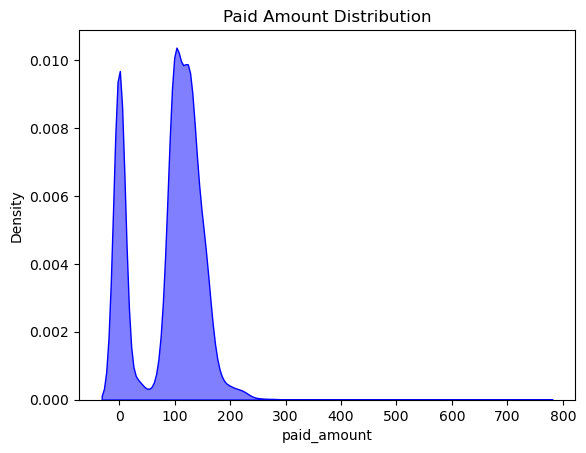

In [35]:
sns.kdeplot(
    df_customers_with_programs['paid_amount'],
    fill=True,
    color='blue',
    alpha=0.5
).set_title('Paid Amount Distribution')

In [36]:
# viualization total paid_amount per year
yearly_totals = df_customers_with_programs.groupby("subscribe_year")["paid_amount"].sum().reset_index()

# Now plot
fig = px.bar(
    yearly_totals,
    x="subscribe_year",
    y="paid_amount",
    title="Total Paid Amount per Year",
    labels={"subscribe_year": "Year", "paid_amount": "Total Paid Amount"},
    text_auto=True,
)
fig.show()

In [37]:
monthly_totals = df_customers_with_programs.groupby("subscribe_month")["paid_amount"].sum().reset_index()

fig = px.bar(
    monthly_totals,
    x="subscribe_month",
    y="paid_amount",
    title="Total Paid Amount per Month",
    labels={"subscribe_month": "Month", "paid_amount": "Total Paid Amount"},
    text_auto=True,
)
fig.show()

In [38]:
df_customers_with_programs['created_month_year'] = pd.to_datetime(df_customers_with_programs['created_month_year_str'], format='%b-%Y')
monthly_totals = df_customers_with_programs.groupby('created_month_year')['paid_amount'].sum().reset_index()

fig = px.line(
    monthly_totals,
    x='created_month_year',
    y='paid_amount',
    title='Total Paid Amount per Year-Month (Ordered)',
    labels={'created_month_year': 'Year-Month', 'paid_amount': 'Total Paid Amount'},
    markers=True
)
fig.update_layout(
    xaxis_tickformat="%b-%Y",
    xaxis_title="Year-Month",
    yaxis_title="Total Paid Amount",
    height=500,
    template="plotly_white",
    xaxis=dict(
        tickmode='linear',
        dtick="M1"  # one tick per month
    )
)
fig.show()

In [39]:
df_customers_with_programs

,id,customer_id,program_id,promocode_id,paid,paid_amount,delivery_start_date,total_days,free_days,status,...,diet_program_name,master_plan_name,subscribe_year,subscribe_month,subscribe_day,subscribe_weekday,subscribe_quarter,subscribe_month_name,created_month_year_str,created_month_year
0,5637272671,5,5637167079,5.637145e+09,1,1.39,31/05/2022,22,0,Cancelled,...,SAYF Plan 22 Days | 2022,None,2022,6,2,Thursday,2,June,Jun-2022,2022-06-01
1,5637276769,5,5637167079,5.637145e+09,1,90.35,22/06/2022,22,0,Completed,...,SAYF Plan 22 Days | 2022,None,2022,6,19,Sunday,2,June,Jun-2022,2022-06-01
2,5637283428,5,5637169327,5.637145e+09,0,0.00,22/09/2022,26,0,Inactive,...,Wanasa Plan 26 Days | 2022,Wanasa,2022,9,19,Monday,3,September,Sep-2022,2022-09-01
3,5637294418,5,5637172399,5.637145e+09,0,0.00,23/03/2023,7,0,Inactive,...,Ramadan Full Plan 7 Days | 2023,Ramadan - Full,2023,3,20,Monday,1,March,Mar-2023,2023-03-01
4,5637294420,5,5637172399,5.637145e+09,0,0.00,30/03/2023,7,0,Inactive,...,Ramadan Full Plan 7 Days | 2023,Ramadan - Full,2023,3,20,Monday,1,March,Mar-2023,2023-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,5637329451,8183,5637180576,5.637203e+09,1,128.25,24/05/2025,26,0,Active,...,Life 6 | 26 Days 2025,Life 6,2025,5,19,Monday,2,May,May-2025,2025-05-01
5872,5637329470,8185,5637180580,5.637145e+09,0,0.00,24/05/2025,20,0,Inactive,...,Life 5 | 20 Days 2025,Life 5,2025,5,19,Monday,2,May,May-2025,2025-05-01
5873,5637329473,8189,5637180581,5.637203e+09,1,109.00,24/05/2025,26,0,Active,...,Life 5 | 26 Days 2025,Life 5,2025,5,20,Tuesday,2,May,May-2025,2025-05-01
5874,5637329481,8194,5637180580,5.637204e+09,1,85.00,25/05/2025,20,0,Active,...,Life 5 | 20 Days 2025,Life 5,2025,5,20,Tuesday,2,May,May-2025,2025-05-01


In [40]:
# convert delivery date to datetime
df_customers_with_programs['delivery_start_date'] = pd.to_datetime(df_customers_with_programs['delivery_start_date'], format='%d/%m/%Y')
df_customers_with_programs['delivery_start_date']

0      2022-05-31
1      2022-06-22
2      2022-09-22
3      2023-03-23
4      2023-03-30
          ...    
5871   2025-05-24
5872   2025-05-24
5873   2025-05-24
5874   2025-05-25
5875   2025-05-23
Name: delivery_start_date, Length: 5876, dtype: datetime64[ns]

In [41]:
# subtract delivery_start_date from created_at to get the delivery duration
df_customers_with_programs['delivery_duration_days'] = (
    df_customers_with_programs['delivery_start_date'].dt.date - 
    df_customers_with_programs['created_at'].dt.date
).apply(lambda x: x.days)
df_customers_with_programs['delivery_duration_days']


0       -2
1        3
2        3
3        3
4       10
        ..
5871     5
5872     5
5873     4
5874     5
5875     3
Name: delivery_duration_days, Length: 5876, dtype: int64

In [42]:
df_customers_with_programs[ df_customers_with_programs['delivery_duration_days'] <= 0][['delivery_start_date', 'created_at', 'delivery_duration_days']]

,delivery_start_date,created_at,delivery_duration_days
0,2022-05-31,2022-06-02 09:47:25,-2
7,2022-05-30,2022-06-07 10:58:18,-8
9,2022-06-03,2022-06-07 11:11:19,-4
11,2022-08-04,2022-08-25 15:40:51,-21
13,2022-05-27,2022-06-07 11:23:21,-11
...,...,...,...
5819,2025-05-03,2025-05-05 17:01:29,-2
5823,2025-04-19,2025-05-06 17:30:04,-17
5824,2025-05-05,2025-05-06 19:38:32,-1
5833,2024-08-27,2025-05-08 16:22:28,-254


In [43]:
df_customers_with_programs['delivery_duration_days'].describe()

count    5876.000000
mean        3.724813
std        17.107629
min      -268.000000
25%         3.000000
50%         3.000000
75%         4.000000
max       730.000000
Name: delivery_duration_days, dtype: float64

In [44]:
# load customers
df_customers = pd.read_csv('../2.clean-data/customers_cleaned.csv')
df_customers

,id,username,email,nationality,gender,date_of_birth,age,height,weight,created_at,...,created_year,created_month,created_month_name,created_day,created_weekday,created_quarter,email_domain,gender_encoded,bmi,created_month_year_str
0,687,tarekmagdi,tarekmagdi81@gmail.com,Others,male,1988-07-24,36.0,175.0,95.0,2022-07-06 12:50:03,...,2022.0,7.0,July,6.0,Wednesday,3.0,gmail.com,1,31.020408,Jul-2022
1,3768,sultan1,NaN,Others,male,1994-05-18,31.0,174.0,93.0,2023-05-02 13:26:41,...,2023.0,5.0,May,2.0,Tuesday,2.0,NaN,1,30.717400,May-2023
2,5179,ayeshafardan,ayeshafardan@gmail.com,Others,female,1989-03-15,36.0,173.0,127.0,2023-09-28 10:21:07,...,2023.0,9.0,September,28.0,Thursday,3.0,gmail.com,0,42.433760,Sep-2023
3,5824,Hananalshibli,Hananals@outlook.com,Others,female,1986-02-15,39.0,146.0,56.0,2024-02-03 19:26:15,...,2024.0,2.0,February,3.0,Saturday,1.0,outlook.com,0,26.271345,Feb-2024
4,2563,aqeel,aqeel.boushehri@gmail.com,Others,male,1989-03-21,36.0,177.0,110.0,2022-11-22 21:57:19,...,2022.0,11.0,November,22.0,Tuesday,4.0,gmail.com,1,35.111239,Nov-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,6848,khalidmajid,majid78@hotmail.com,Pakistan,male,1978-01-09,47.0,189.0,81.0,2024-08-05 10:22:59,...,2024.0,8.0,August,5.0,Monday,3.0,hotmail.com,1,22.675737,Aug-2024
8024,6868,syedusama,usamanajeeb003@gmail.com,Pakistan,male,1993-08-28,31.0,194.0,59.0,2024-08-09 13:10:09,...,2024.0,8.0,August,9.0,Friday,3.0,gmail.com,1,15.676480,Aug-2024
8025,7421,Anita,NaN,Pakistan,female,1966-02-25,59.0,145.4,91.2,2024-12-10 18:45:16,...,2024.0,12.0,December,10.0,Tuesday,4.0,NaN,0,43.138598,Dec-2024
8026,7676,arwa98,NaN,Pakistan,female,1998-06-09,27.0,163.0,62.0,2025-01-24 21:43:16,...,2025.0,1.0,January,24.0,Friday,1.0,NaN,0,23.335466,Jan-2025


In [45]:
df_customers_with_subscribers = pd.merge(
    df_customers_with_programs,
    df_customers,
    left_on='customer_id',
    right_on='id',
    how='inner',
    suffixes=('_program', '_customer')
)
df_customers_with_subscribers

,id_program,customer_id,program_id,promocode_id,paid,paid_amount,delivery_start_date,total_days,free_days,status,...,created_year,created_month,created_month_name,created_day,created_weekday,created_quarter,email_domain,gender_encoded,bmi,created_month_year_str_customer
0,5637272671,5,5637167079,5.637145e+09,1,1.39,2022-05-31,22,0,Cancelled,...,2022.0,6.0,June,1.0,Wednesday,2.0,NaN,1,25.663124,Jun-2022
1,5637276769,5,5637167079,5.637145e+09,1,90.35,2022-06-22,22,0,Completed,...,2022.0,6.0,June,1.0,Wednesday,2.0,NaN,1,25.663124,Jun-2022
2,5637283428,5,5637169327,5.637145e+09,0,0.00,2022-09-22,26,0,Inactive,...,2022.0,6.0,June,1.0,Wednesday,2.0,NaN,1,25.663124,Jun-2022
3,5637294418,5,5637172399,5.637145e+09,0,0.00,2023-03-23,7,0,Inactive,...,2022.0,6.0,June,1.0,Wednesday,2.0,NaN,1,25.663124,Jun-2022
4,5637294420,5,5637172399,5.637145e+09,0,0.00,2023-03-30,7,0,Inactive,...,2022.0,6.0,June,1.0,Wednesday,2.0,NaN,1,25.663124,Jun-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,5637329451,8183,5637180576,5.637203e+09,1,128.25,2025-05-24,26,0,Active,...,2025.0,5.0,May,19.0,Monday,2.0,NaN,0,27.590089,May-2025
5861,5637329470,8185,5637180580,5.637145e+09,0,0.00,2025-05-24,20,0,Inactive,...,2025.0,5.0,May,19.0,Monday,2.0,gmail.com,0,29.475843,May-2025
5862,5637329473,8189,5637180581,5.637203e+09,1,109.00,2025-05-24,26,0,Active,...,2025.0,5.0,May,19.0,Monday,2.0,NaN,1,27.343750,May-2025
5863,5637329481,8194,5637180580,5.637204e+09,1,85.00,2025-05-25,20,0,Active,...,2025.0,5.0,May,19.0,Monday,2.0,gmail.com,1,33.749456,May-2025


In [46]:
df_customers_with_subscribers.to_csv('../2.clean-data/customers_with_subscribers.csv', index=False)

In [47]:
# visaulize the nationality with diet programs
px.histogram(
    df_customers_with_subscribers,
    x='nationality',
    title='Number of Customers with Diet Programs by Nationality',
    text_auto=True,
    color='gender',
).update_layout(bargap=0.2)


In [48]:
df_customers_with_subscribers['age'].describe()

count    5865.000000
mean       30.770332
std        15.176596
min         0.000000
25%        25.000000
50%        32.000000
75%        40.000000
max       125.000000
Name: age, dtype: float64

In [49]:
age_bins = [0, 18, 25, 35, 45, 60, 100, 130]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-59', '60-99', '100+']

df_customers_with_subscribers['age_group'] = pd.cut(
    df_customers_with_subscribers['age'],
    bins=age_bins,
    labels=age_labels,
    right=False,
    include_lowest=True
)

df_customers_with_subscribers['age_group'].value_counts().sort_index()

age_group
<18       927
18-24     486
25-34    1929
35-44    1625
45-59     758
60-99     139
100+        1
Name: count, dtype: int64

In [50]:
# visualize age group with programs
px.histogram(
    df_customers_with_subscribers,
    x='age_group',
    title='Number of Customers with Diet Programs by Age Group',
    text_auto=True,
    color='gender'
).update_layout(bargap=0.2)

In [51]:
age_paid_sum = df_customers_with_subscribers.groupby(['age_group', 'gender'])['paid_amount'].sum().reset_index()

px.bar(
    age_paid_sum,
    x='age_group',
    y='paid_amount',
    title='Total Paid Amount by Age Group',
    labels={'age_group': 'Age Group', 'paid_amount': 'Total Paid Amount'},
    text_auto=True,
    color='gender'
)

C:\Users\elsay\AppData\Local\Temp\ipykernel_10016\4081075227.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [52]:
# display all subscribers per master plan
df_customers_with_subscribers.groupby('master_plan_name')['customer_id'].count().reset_index().rename({'customer_id': 'count'})


,master_plan_name,customer_id
0,Almadrasa,9
1,Dowa Alyada (Initiative),2
2,Dynamic,56
3,Eco,107
4,Full,203
...,...,...
80,WEIGHT LOSS 5,155
81,Wanasa,56
82,Weight Loss,633
83,Weight Loss 5,634


In [53]:
# subscribers per master plan
df_customers_with_subscribers.groupby('master_plan_name')['customer_id'].count().reset_index().rename(mapper={'customer_id': 'count'}, axis=1).sort_values(by='count',ascending=False)

,master_plan_name,count
83,Weight Loss 5,634
82,Weight Loss,633
14,LIFE - 5,519
42,Life 5,411
31,Life - Full,304
...,...,...
49,PROTEIN 100 | 2 + 1,2
72,Sports 100g (2 Mains + Snack),1
74,Sports 100g (3 Mains + Snack),1
52,PROTEIN 150 - 2 + 1,1


In [54]:
# customers per master plan with age intervals
df_customers_with_subscribers.groupby(['master_plan_name', 'age_group'])['customer_id'].count().reset_index().rename(mapper={'customer_id': 'count'}, axis=1).sort_values(by=['master_plan_name','count'],ascending=False)

C:\Users\elsay\AppData\Local\Temp\ipykernel_10016\570880192.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,master_plan_name,age_group,count
591,World Cup,35-44,65
590,World Cup,25-34,52
588,World Cup,<18,29
592,World Cup,45-59,23
589,World Cup,18-24,11
...,...,...,...
3,Almadrasa,35-44,2
0,Almadrasa,<18,0
4,Almadrasa,45-59,0
5,Almadrasa,60-99,0


In [55]:
# customers per master plan with gender
df_customers_with_subscribers.groupby(['master_plan_name', 'gender'])['customer_id'].count().reset_index().rename(mapper={'customer_id': 'count'}, axis=1).sort_values(by=['master_plan_name','count'],ascending=False)

,master_plan_name,gender,count
152,World Cup,female,96
153,World Cup,male,84
154,World Cup,unknown,1
150,Weight Loss 5,female,338
151,Weight Loss 5,male,296
...,...,...,...
4,Dynamic,male,29
3,Dynamic,female,27
1,Dowa Alyada (Initiative),female,1
2,Dowa Alyada (Initiative),male,1


# Customers' menu items selection

In [56]:
# select items which no customers selected yet
items_not_selected = pd.read_sql_query(""" select
	dp.id as program_id,
	dp.name_en as program,
	dpmi.program_day,
	dpm.meal_code,
	dpm.name_en as meal_name,
	dpi.id as item_id,
	dpi.name_en as item_name_en,
	dpi.name as item_name_ar,
	dpi.created_at as item_created_at
from
	diet_program_items dpi
left join
customers_program_menus cpm on
	dpi.id = cpm.program_item_id
inner join diet_program_meal_items dpmi 
on
	dpi.id = dpmi.diet_program_item_id
inner join diet_program_meals dpm on
	dpm.id = dpmi.diet_program_meal_id
inner join diet_programs dp on
	dpm.diet_program_id = dp.id
where
	cpm.id is null;""", engine)
items_not_selected

,program_id,program,program_day,meal_code,meal_name,item_id,item_name_en,item_name_ar,item_created_at
0,5637170907,Medical - Seven 22 Days | 2023,1,CAT03,Lunch,5637255560,Asian Orange Chicken (MD),دجاج وبرتقال على الطريقة الآسيوية,2023-01-25 07:37:34
1,5637170907,Medical - Seven 22 Days | 2023,3,CAT06,Dinner,5637255545,Tuna Panini (MD),بانيني تونة,2023-01-25 07:37:34
2,5637170907,Medical - Seven 22 Days | 2023,4,CAT06,Dinner,5637255543,Eggs Potato Sandwich (MD),سندويش بيض وبطاطا,2023-01-25 07:37:34
3,5637170907,Medical - Seven 22 Days | 2023,11,CAT03,Lunch,5637255554,Feta Eggplant Pasta (MD),باستا باذنجان وفيتا,2023-01-25 07:37:34
4,5637170907,Medical - Seven 22 Days | 2023,13,CAT03,Lunch,5637255556,Ratatouille and Ricotta Macaroni (MD),معكرونة راتاتوي وريكوتا,2023-01-25 07:37:34
...,...,...,...,...,...,...,...,...,...
288,5637179078,Life Medical Five 2024 | 26 Days,24,CAT05,Dinner,5637261659,Beet-Hummus Sandwich (MD),سندويش حمص-شمندر,2023-11-25 08:16:29
289,5637179079,Life Medical Five 2024 | 22 Days,8,CAT03,Lunch,5637261617,Spicy Thai Shrimps w/ Veggie Noodles (MD),روبيان حار على الطريقة التايلندية مع نودلز خضار,2023-11-25 08:16:29
290,5637179079,Life Medical Five 2024 | 22 Days,11,CAT05,Dinner,5637261659,Beet-Hummus Sandwich (MD),سندويش حمص-شمندر,2023-11-25 08:16:29
291,5637179079,Life Medical Five 2024 | 22 Days,21,CAT03,Lunch,5637261617,Spicy Thai Shrimps w/ Veggie Noodles (MD),روبيان حار على الطريقة التايلندية مع نودلز خضار,2023-11-25 08:16:29


In [57]:
# working on selected items
df_customers_with_selected_items = pd.read_sql_query(""" SELECT 
                                               cpm.customer_program_id,
                                                cpm.customer_id,
                                                cpm.program_day,
                                                cpm.calender_date,
                                                dpi.id as item_id,
                                                dpi.name_en as item_name,
                                                dpm.meal_code as meal_code,
                                                dpm.name_en as meal_name,
                                                cpm.rate
                                            FROM
                                                customers_programs cp
                                            INNER JOIN customers c on
                                                cp.customer_id = c.id
                                            INNER JOIN customers_program_menus cpm on
                                                cp.id = cpm.customer_program_id
                                            INNER JOIN diet_program_items dpi on
                                                cpm.program_item_id = dpi.id
                                            INNER JOIN diet_program_meals dpm on
                                                cpm.program_meal_id = dpm.id
                                            where
                                                c.deleted_at is null
                                                and c.id <> 4""", engine)
df_customers_with_selected_items

,customer_program_id,customer_id,program_day,calender_date,item_id,item_name,meal_code,meal_name,rate
0,5637272671,5,1,07/06/2022,5637248826,Cheese Fatayer,CAT01,Breakfast,0.0
1,5637272671,5,2,08/06/2022,5637248857,Mediterranean Egg Wrap,CAT01,Breakfast,0.0
2,5637272671,5,5,11/06/2022,5637248907,Cheese Croissant,CAT01,Breakfast,0.0
3,5637272671,5,8,14/06/2022,5637249067,Falafel Pita Bread,CAT01,Breakfast,0.0
4,5637272671,5,9,15/06/2022,5637248907,Cheese Croissant,CAT01,Breakfast,0.0
...,...,...,...,...,...,...,...,...,...
572331,5637329454,8167,18,28/05/2025,5637248987,Spinach Fatayer,CAT01,Breakfast,0.0
572332,5637329454,8167,18,28/05/2025,5637269185,Qouzi,CAT02,Lunch,0.0
572333,5637329454,8167,18,28/05/2025,5637269247,Pesto Pasta,CAT03,Dinner,0.0
572334,5637329454,8167,18,28/05/2025,5637269195,Quinoa Tabbouleh,CAT04,Snack 1,0.0


In [58]:
df_customers_with_selected_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572336 entries, 0 to 572335
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_program_id  572336 non-null  int64  
 1   customer_id          572336 non-null  int64  
 2   program_day          572336 non-null  int64  
 3   calender_date        572336 non-null  object 
 4   item_id              572336 non-null  int64  
 5   item_name            572336 non-null  object 
 6   meal_code            572336 non-null  object 
 7   meal_name            572336 non-null  object 
 8   rate                 572336 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 39.3+ MB


In [59]:
# transform calender_date to date formate
df_customers_with_selected_items['calender_date'] = pd.to_datetime(
    df_customers_with_selected_items['calender_date'], 
    format='%d/%m/%Y', 
    errors='coerce'
)

In [60]:
# most items selected
df_customers_with_selected_items['item_name'].value_counts().reset_index()

,item_name,count
0,Chicken Caesar Salad,24971
1,Fattoush,13721
2,Chicken Biryani,10314
3,Beef Machboos,8742
4,Za'atar Fatayer,8242
...,...,...
1157,Veggie Red Curry Noodles (MD),1
1158,Beef and White Beans Stew with Rice (MD),1
1159,Spicy Chicken Sandwich (MD),1
1160,Chicken Caesar Wrap (MD),1


In [61]:
# Most common selected item for each meal_name
df_customers_with_selected_items.groupby('meal_name')['item_name'].agg(lambda x: x.value_counts().idxmax()).reset_index().rename(columns={'item_name': 'most_selected_item'})

,meal_name,most_selected_item
0,Appetizer,Vegetables Samosa
1,Beverage,Light Vimto
2,Breakfast,Za'atar Fatayer
3,Breakfast / Snack,Chocolate Protein Shake (KETO)
4,Breakfast 1,Chocolate Croissant
5,Breakfast 2,Chocolate Croissant
6,Breakfast Or Side,Cheese Fatayer
7,Breakfast Or Side Dish,Cheese Fatayer
8,Breakfast Or Snack,Cheese Fatayer
9,Dinner,Halloumi Tapenade Wrap


In [62]:
# Most common selected item for each program_day
df_customers_with_selected_items.groupby('program_day')['item_name'].agg(lambda x: x.value_counts().idxmax()).reset_index().rename(columns={'item_name': 'most_selected_item'})

,program_day,most_selected_item
0,1,Chicken Caesar Salad
1,2,Chicken Caesar Salad
2,3,Beef Machboos
3,4,Chicken Caesar Salad
4,5,Fattoush
5,6,Chicken Caesar Salad
6,7,Fattoush
7,8,Chicken Caesar Salad
8,9,Chicken Musahab Sandwich
9,10,Greek Salad


In [63]:
# join df_customers_with_selected_items with df_customers_with_subscribers dependent on df_customers_with_selected_items.customer_program_id  = df_customers_with_subscribers.id_program
df_selected_items_with_subscribers = pd.merge(
    df_customers_with_selected_items,
    df_customers_with_subscribers,
    left_on='customer_program_id',
    right_on='id_program',
    how='inner'
)
df_selected_items_with_subscribers

,customer_program_id,customer_id_x,program_day,calender_date,item_id,item_name,meal_code,meal_name,rate,id_program,...,created_month,created_month_name,created_day,created_weekday,created_quarter,email_domain,gender_encoded,bmi,created_month_year_str_customer,age_group
0,5637272671,5,1,2022-06-07,5637248826,Cheese Fatayer,CAT01,Breakfast,0.0,5637272671,...,6.0,June,1.0,Wednesday,2.0,NaN,1,25.663124,Jun-2022,25-34
1,5637272671,5,2,2022-06-08,5637248857,Mediterranean Egg Wrap,CAT01,Breakfast,0.0,5637272671,...,6.0,June,1.0,Wednesday,2.0,NaN,1,25.663124,Jun-2022,25-34
2,5637272671,5,5,2022-06-11,5637248907,Cheese Croissant,CAT01,Breakfast,0.0,5637272671,...,6.0,June,1.0,Wednesday,2.0,NaN,1,25.663124,Jun-2022,25-34
3,5637272671,5,8,2022-06-14,5637249067,Falafel Pita Bread,CAT01,Breakfast,0.0,5637272671,...,6.0,June,1.0,Wednesday,2.0,NaN,1,25.663124,Jun-2022,25-34
4,5637272671,5,9,2022-06-15,5637248907,Cheese Croissant,CAT01,Breakfast,0.0,5637272671,...,6.0,June,1.0,Wednesday,2.0,NaN,1,25.663124,Jun-2022,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571226,5637329454,8167,18,2025-05-28,5637248987,Spinach Fatayer,CAT01,Breakfast,0.0,5637329454,...,5.0,May,18.0,Sunday,2.0,NaN,0,31.141869,May-2025,25-34
571227,5637329454,8167,18,2025-05-28,5637269185,Qouzi,CAT02,Lunch,0.0,5637329454,...,5.0,May,18.0,Sunday,2.0,NaN,0,31.141869,May-2025,25-34
571228,5637329454,8167,18,2025-05-28,5637269247,Pesto Pasta,CAT03,Dinner,0.0,5637329454,...,5.0,May,18.0,Sunday,2.0,NaN,0,31.141869,May-2025,25-34
571229,5637329454,8167,18,2025-05-28,5637269195,Quinoa Tabbouleh,CAT04,Snack 1,0.0,5637329454,...,5.0,May,18.0,Sunday,2.0,NaN,0,31.141869,May-2025,25-34


In [64]:
df_selected_items_with_subscribers.columns

Index(['customer_program_id', 'customer_id_x', 'program_day', 'calender_date',
       'item_id', 'item_name', 'meal_code', 'meal_name', 'rate', 'id_program',
       'customer_id_y', 'program_id', 'promocode_id', 'paid', 'paid_amount',
       'delivery_start_date', 'total_days', 'free_days', 'status',
       'created_at_program', 'diet_program_name', 'master_plan_name',
       'subscribe_year', 'subscribe_month', 'subscribe_day',
       'subscribe_weekday', 'subscribe_quarter', 'subscribe_month_name',
       'created_month_year_str_program', 'created_month_year',
       'delivery_duration_days', 'id_customer', 'username', 'email',
       'nationality', 'gender', 'date_of_birth', 'age', 'height', 'weight',
       'created_at_customer', 'deleted_at', 'birth_year', 'birth_month',
       'birth_day', 'birth_weekday', 'birth_quarter', 'created_year',
       'created_month', 'created_month_name', 'created_day', 'created_weekday',
       'created_quarter', 'email_domain', 'gender_encoded', 'bm

In [65]:
df_selected_items_with_subscribers.drop(columns=['customer_id_x', 'promocode_id', 'paid', 'paid_amount', 'delivery_start_date', 'total_days', 'free_days', 'created_at_program', 'username', 'email', 'date_of_birth', 'email_domain'], axis=1, inplace=True)

In [66]:
df_selected_items_with_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571231 entries, 0 to 571230
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   customer_program_id              571231 non-null  int64         
 1   program_day                      571231 non-null  int64         
 2   calender_date                    571231 non-null  datetime64[ns]
 3   item_id                          571231 non-null  int64         
 4   item_name                        571231 non-null  object        
 5   meal_code                        571231 non-null  object        
 6   meal_name                        571231 non-null  object        
 7   rate                             571231 non-null  float64       
 8   id_program                       571231 non-null  int64         
 9   customer_id_y                    571231 non-null  int64         
 10  program_id                       571231 non-

In [67]:
# Most common selected item for each program
df_selected_items_with_subscribers.groupby('diet_program_name')['item_name'].agg(lambda x: x.value_counts().idxmax()).reset_index().rename(columns={'item_name': 'most_selected_item'})

,diet_program_name,most_selected_item
0,Al Madrasah Plan 20 Days | 2023,Fruit
1,Al Tawfeer Plan 26 Days | 2023,Za'atar Croissant
2,Dowa Alyada Plan 22 Days,Chicken Caesar Salad
3,Dynamic Plan 22 Days | 2023,Beef Machboos
4,Dynamic Plan 26 Days | 2023,Chicken Caesar Salad
...,...,...
180,Weight Loss Plan 30 Days I 2022,Chicken Caesar Salad
181,Weight Loss Plan 30 Days | 2023,Chicken Caesar Salad
182,World Cup Pro Plan 22 Days | 2022,Chicken Caesar Salad
183,World Cup Pro Plan 26 Days | 2022,Chicken Caesar Salad


In [68]:
# Most common selected item for each master plan
df_selected_items_with_subscribers.groupby('master_plan_name')['item_name'].agg(lambda x: x.value_counts().idxmax()).reset_index().rename(columns={'item_name': 'most_selected_item'})

,master_plan_name,most_selected_item
0,Almadrasa,Fruit
1,Dowa Alyada (Initiative),Chicken Caesar Salad
2,Dynamic,Chicken Caesar Salad
3,Eco,Chicken Biryani
4,Full,Chicken Caesar Salad
...,...,...
78,WEIGHT LOSS 5,Chicken Caesar Salad
79,Wanasa,Chicken Caesar Salad
80,Weight Loss,Chicken Caesar Salad
81,Weight Loss 5,Chicken Caesar Salad


In [69]:
# Most common selected item for each age_group
df_selected_items_with_subscribers.groupby('age_group')['item_name'].agg(lambda x: x.value_counts().idxmax()).reset_index().rename(columns={'item_name': 'most_selected_item'})

C:\Users\elsay\AppData\Local\Temp\ipykernel_10016\860554751.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,age_group,most_selected_item
0,<18,Chicken Caesar Salad
1,18-24,Chicken Caesar Salad
2,25-34,Chicken Caesar Salad
3,35-44,Chicken Caesar Salad
4,45-59,Chicken Caesar Salad
5,60-99,Chicken Caesar Salad
6,100+,Fattoush


In [70]:
# Most common selected item for each nationality
df_selected_items_with_subscribers.groupby('nationality')['item_name'].agg(lambda x: x.value_counts().idxmax()).reset_index().rename(columns={'item_name': 'most_selected_item'})

,nationality,most_selected_item
0,Algeria,Chicken Caesar Salad
1,Armenia,Turkey & Cheese Sandwich (Keto)
2,Canada,Chicken Caesar Salad
3,Egypt,Chicken Caesar Salad
4,India,Chicken Caesar Salad
5,Iran,Chicken Caesar Salad
6,Iraq,Chicken Caesar Salad
7,Jordan,Chicken Caesar Salad
8,Kuwait,Chicken Caesar Salad
9,Lebanon,Chicken Caesar Salad


In [71]:
df_selected_items_with_subscribers.to_csv("../2.clean-data/df_selected_items_with_subscribers.csv", index=False)